# TEST 1: Leveraging LLMs for Feature Generation and Classification

Typically, if our data has $N$ features, we need around $10N$ data items to reach peak performance with classic classifiers like Logistic Regression. Therefore, if our vocabulary has 10,000 words, we would need around 1 million items in the training set to reach peak performance.

An interesting idea regarding this was explored in 2024 in [Balek, V., S'ykora, L., Sklen'ak, V., & Kliegr, T. (2024). LLM-based feature generation from text for interpretable machine learning. ArXiv, abs/2409.07132](https://arxiv.org/abs/2409.07132). The idea is to use an LLM to generate meaningful and interpretable features from text, and then use Logistic Regression for classification.

For example, in the movie plots dataset, we could have features like:
- "Is the protagonist an animal?" (0 or 1)
- "Does the plot indicate psychological suffering?" (0 or 1)

With a reasonable number of these features, our model could make predictions based on meaningful features instead of raw words.

## Objectives
* Perform feature extraction for a particular dataset
* Compare performance and explainability of classifiers with different approaches. 

## Rules

I highlight a few elements of our usual rules:

* You are **NOT ALLOWED** to use AI to generate any code you are asked to make yourself. This includes ChatGPT, CoPilot and all similar generators.
* You are **NOT ALLOWED** to use Google or any other search engine.
* You are **ALLOWED** to use the offical documentations for libraries: 
    * [sklearn](https://scikit-learn.org/)
    * [numpy](https://numpy.org/)
    * [matplotlib](https://matplotlib.org/)
    * [google AI studio](https://aistudio.google.com/)
* You are **ALLOWED** to use previous code from this course as basis.
* You **MUST** use the university's proctoring software to show you are complying with these rules
* This task is **INDIVIDUAL**. DO NOT share your code or results with anyone else.

## Tasks and Deliverables

* At any point, refer to [Balek et al.](https://arxiv.org/abs/2409.07132). 
* Make a well-commented code to solve each one of the tasks below.
* Each task will be evaluated as:
    * Insufficient: task is not done, off-topic, or low-effort
    * In process: task is incomplete, done with a clear conceptual error, or comments 
    * Proficient: everything works and comments are enough to understand what is being done
    * Advanced: everything works, comments are enough to understand what is being done, and code is well organized and formated using functions, dataclasses, and other adequate structures.
* This task should be finished by the end of the class.
* After you are finished, submit the executed notebook in our LMS system.

<div style="background-color: #f2f2f2; color: #000;">


TESTE 1: Aproveitando LLMs para Geração de Recursos (Features) e Classificação

Normalmente, se nosso conjunto de dados possui N recursos (features), precisamos de aproximadamente 10N itens de dados para atingir desempenho máximo com classificadores clássicos como Regressão Logística. Portanto, se nosso vocabulário tiver 10.000 palavras, precisaríamos de cerca de 1 milhão de itens no conjunto de treinamento para alcançar esse desempenho máximo.

Uma ideia interessante sobre isso foi explorada em 2024 em Balek, V., S’ykora, L., Sklen’ak, V., & Kliegr, T. (2024). LLM-based feature generation from text for interpretable machine learning. ArXiv, abs/2409.07132. A ideia é usar um LLM para gerar recursos significativos e interpretáveis a partir de textos e, em seguida, utilizar Regressão Logística para classificação.

Por exemplo, no conjunto de dados de enredos de filmes, poderíamos ter recursos como:
	•	“O protagonista é um animal?” (0 ou 1)
	•	“O enredo indica sofrimento psicológico?” (0 ou 1)

Com um número razoável desses recursos, nosso modelo poderia fazer previsões com base em recursos mais significativos em vez de apenas palavras brutas.

Objetivos
	•	Realizar extração de recursos (features) para um conjunto de dados específico
	•	Comparar desempenho e interpretabilidade de classificadores com diferentes abordagens

Regras

Destaco alguns elementos das nossas regras usuais:
	•	Você NÃO PODE usar IA para gerar qualquer código que lhe seja solicitado criar. Isso inclui ChatGPT, CoPilot e todos os geradores semelhantes.
	•	Você NÃO PODE usar Google ou qualquer outro mecanismo de busca.
	•	Você PODE usar a documentação oficial das bibliotecas:
	•	sklearn
	•	numpy
	•	matplotlib
	•	google AI studio
	•	Você PODE usar códigos anteriores deste curso como base.
	•	Você DEVE usar o software de monitoramento (proctoring) da universidade para mostrar que está cumprindo essas regras.
	•	Esta tarefa é INDIVIDUAL. NÃO compartilhe seu código ou resultados com mais ninguém.

Tarefas e Entregáveis
	•	Em qualquer ponto, consulte Balek et al..
	•	Crie um código bem comentado para resolver cada uma das tarefas abaixo.
	•	Cada tarefa será avaliada como:
	•	Insuficiente: tarefa não foi feita, está fora do tema ou com esforço muito baixo
	•	Em processo: tarefa incompleta, com erro conceitual claro ou comentários insuficientes
	•	Proficiente: tudo funciona e os comentários são suficientes para entender o que está sendo feito
	•	Avançado: tudo funciona, comentários são suficientes para entender o que está sendo feito e o código é bem organizado e formatado, usando funções, dataclasses e outras estruturas adequadas.
	•	Esta tarefa deve ser finalizada até o fim da aula.
	•	Após finalizar, envie o notebook executado no nosso sistema de LMS.

1. Preparação do Conjunto de Dados:

Adaptando a estratégia de Balek et al. para nosso caso de classificação de enredos de filmes, crie um conjunto de dados com pelo menos 100 itens rotulados e pelo menos 5 recursos significativos. Nenhum dos recursos pode ser a própria classe (“este enredo é de drama?”). Use uma estratégia clara para não exceder cotas de uso gratuito. Armazene os dados localmente no formato de sua escolha.

Use GEMINI_API_KEY se necessário.

</div>


### 1. Dataset Preparation:
Adapting Balek et al.'s strategy to our movie plot classification case, create a dataset with at least 100 labeled items and at least 5 meaningful features. None of the features can be the class itself ("is this a drama plot?"). Use a clear strategy to avoid exceeding free tier quotas. Store data locally in a format of your choice.

In [6]:
import os
import time
import json
import pandas as pd
from dotenv import load_dotenv
import google.generativeai as genai
from tqdm import tqdm

# Carrega a chave da API GEMINI dos environment variables
load_dotenv()
GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')
if GEMINI_API_KEY is None:
    raise ValueError("GEMINI_API_KEY não está definido nas variáveis de ambiente.")

# Configura o client da API
genai.configure(api_key=GEMINI_API_KEY)

def clean_response_text(text: str) -> str:
    """
    Remove delimitadores de bloco de código (ex: ```json ... ```) da resposta,
    se presentes.
    """
    text = text.strip()
    if text.startswith("```"):
        lines = text.splitlines()
        if lines[0].startswith("```"):
            lines = lines[1:]
        if lines and lines[-1].startswith("```"):
            lines = lines[:-1]
        text = "\n".join(lines).strip()
    return text

def generate_features(plot: str) -> dict:
    """
    Dado um enredo de filme, essa função consulta o LLM para gerar um objeto JSON
    com 5 features definidas.
    
    Em caso de falha (por exemplo, resposta vazia ou erro de parsing), a função tenta novamente
    até 3 vezes (levando em conta as limitações inerentes à conta free do Gemini).
    
    Se todas as tentativas falharem, retorna valores padrão (zeros).
    
    Apenas gera log (print) em caso de erro.
    """
    prompt = (
        "Generate a JSON object with 5 features extracted from the following movie plot. "
        "Do not include any feature that indicates the plot's class. Use the following keys and definitions:\n"
        "- 'protagonist_is_animal': 1 if the protagonist is an animal, else 0.\n"
        "- 'psychological_suffering': 1 if the plot indicates psychological suffering, else 0.\n"
        "- 'romantic_element': 1 if the plot includes a romantic element, else 0.\n"
        "- 'action_intensity': an integer from 0 (low action) to 10 (high action).\n"
        "- 'mystery_presence': 1 if the plot includes a mystery element, else 0.\n"
        "Provide only the JSON object.\n"
        "Plot: " + plot
    )
    
    generation_config = genai.GenerationConfig(
        max_output_tokens=100,
        temperature=0.0,
    )
    
    model = genai.GenerativeModel(model_name="gemini-1.5-flash")
    
    required_keys = [
        "protagonist_is_animal",
        "psychological_suffering",
        "romantic_element",
        "action_intensity",
        "mystery_presence"
    ]
    
    max_attempts = 3
    for attempt in range(1, max_attempts + 1):
        try:
            response = model.generate_content(prompt, generation_config=generation_config)
            response_text = response.text.strip()
            response_text = clean_response_text(response_text)
            
            if not response_text:
                raise ValueError("Resposta vazia da API")
            
            features = json.loads(response_text)
            for key in required_keys:
                if key not in features:
                    raise ValueError(f"Chave '{key}' ausente na resposta: {features}")
            return features
        
        except Exception as e:
            print(f"[Erro] Tentativa {attempt} falhou: {e}")
            time.sleep(2)
    
    # Se todas as tentativas falharem, retorna valores padrão zerados
    print("[Erro] Todas as tentativas falharam. Retornando valores padrão zerados.")
    return {
        "protagonist_is_animal": 0,
        "psychological_suffering": 0,
        "romantic_element": 0,
        "action_intensity": 0,
        "mystery_presence": 0
    }

# Carrega o dataset de enredos de filmes
df = pd.read_csv('https://raw.githubusercontent.com/tiagoft/NLP/main/wiki_movie_plots_drama_comedy.csv')

# Seleciona os 100 primeiros itens para a amostra
df_sample = df.head(100).copy()

# Inicializa uma lista para armazenar os dicionários de features
features_list = []

# Utiliza tqdm para exibir uma barra de progresso durante o processamento
for idx, row in tqdm(df_sample.iterrows(), total=len(df_sample), desc="Processando enredos"):
    plot = row['Plot']
    features = generate_features(plot)
    features_list.append(features)
    time.sleep(1)  # Pausa para evitar exceder as limitações da conta free

# Converte a lista de dicionários em um DataFrame
df_features = pd.DataFrame(features_list)

# Adiciona as colunas originais de enredo e gênero para referência
df_features['Plot'] = df_sample['Plot'].values
df_features['Genre'] = df_sample['Genre'].values

# Salva o dataset resultante localmente como um arquivo CSV
df_features.to_csv("movie_plots_features.csv", index=False)
print("Dataset com features geradas salvo como 'movie_plots_features.csv'.")

Processando enredos:  17%|█▋        | 17/100 [00:31<02:33,  1.85s/it]

[Erro] Tentativa 1 falhou: 429 Resource has been exhausted (e.g. check quota).


Processando enredos:  19%|█▉        | 19/100 [00:37<03:02,  2.25s/it]

[Erro] Tentativa 1 falhou: 429 Resource has been exhausted (e.g. check quota).


Processando enredos:  21%|██        | 21/100 [00:43<03:18,  2.51s/it]

[Erro] Tentativa 1 falhou: 429 Resource has been exhausted (e.g. check quota).


Processando enredos:  22%|██▏       | 22/100 [00:47<03:48,  2.93s/it]

[Erro] Tentativa 1 falhou: 429 Resource has been exhausted (e.g. check quota).


Processando enredos:  23%|██▎       | 23/100 [00:51<04:09,  3.24s/it]

[Erro] Tentativa 1 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Tentativa 2 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Tentativa 3 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Todas as tentativas falharam. Retornando valores padrão zerados.


Processando enredos:  39%|███▉      | 39/100 [01:25<01:48,  1.78s/it]

[Erro] Tentativa 1 falhou: 429 Resource has been exhausted (e.g. check quota).


Processando enredos:  42%|████▏     | 42/100 [01:33<02:01,  2.10s/it]

[Erro] Tentativa 1 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Tentativa 2 falhou: 429 Resource has been exhausted (e.g. check quota).


Processando enredos:  44%|████▍     | 44/100 [01:41<02:40,  2.87s/it]

[Erro] Tentativa 1 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Tentativa 2 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Tentativa 3 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Todas as tentativas falharam. Retornando valores padrão zerados.


Processando enredos:  46%|████▌     | 46/100 [01:50<03:10,  3.53s/it]

[Erro] Tentativa 1 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Tentativa 2 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Tentativa 3 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Todas as tentativas falharam. Retornando valores padrão zerados.


Processando enredos:  68%|██████▊   | 68/100 [02:35<00:56,  1.75s/it]

[Erro] Tentativa 1 falhou: 429 Resource has been exhausted (e.g. check quota).


Processando enredos:  69%|██████▉   | 69/100 [02:38<01:14,  2.39s/it]

[Erro] Tentativa 1 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Tentativa 2 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Tentativa 3 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Todas as tentativas falharam. Retornando valores padrão zerados.


Processando enredos:  70%|███████   | 70/100 [02:46<01:57,  3.92s/it]

[Erro] Tentativa 1 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Tentativa 2 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Tentativa 3 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Todas as tentativas falharam. Retornando valores padrão zerados.


Processando enredos:  72%|███████▏  | 72/100 [02:55<01:52,  4.01s/it]

[Erro] Tentativa 1 falhou: 429 Resource has been exhausted (e.g. check quota).


Processando enredos:  91%|█████████ | 91/100 [03:31<00:15,  1.75s/it]

[Erro] Tentativa 1 falhou: 429 Resource has been exhausted (e.g. check quota).


Processando enredos:  93%|█████████▎| 93/100 [03:36<00:15,  2.19s/it]

[Erro] Tentativa 1 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Tentativa 2 falhou: 429 Resource has been exhausted (e.g. check quota).


Processando enredos:  94%|█████████▍| 94/100 [03:42<00:20,  3.38s/it]

[Erro] Tentativa 1 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Tentativa 2 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Tentativa 3 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Todas as tentativas falharam. Retornando valores padrão zerados.


Processando enredos:  95%|█████████▌| 95/100 [03:50<00:23,  4.61s/it]

[Erro] Tentativa 1 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Tentativa 2 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Tentativa 3 falhou: 429 Resource has been exhausted (e.g. check quota).
[Erro] Todas as tentativas falharam. Retornando valores padrão zerados.


Processando enredos:  96%|█████████▌| 96/100 [03:57<00:21,  5.47s/it]

[Erro] Tentativa 1 falhou: 429 Resource has been exhausted (e.g. check quota).


Processando enredos: 100%|██████████| 100/100 [04:07<00:00,  2.47s/it]

Dataset com features geradas salvo como 'movie_plots_features.csv'.


In [7]:
len(df_features)

100

In [8]:
df_features.head()

,protagonist_is_animal,psychological_suffering,romantic_element,action_intensity,mystery_presence,Plot,Genre
0,0,1,0,2,0,The film is about a family who move to the sub...,comedy
1,0,0,0,2,0,Before heading out to a baseball game at a nea...,comedy
2,0,0,0,2,0,The plot is that of a black woman going to the...,comedy
3,0,1,0,6,0,On a beautiful summer day a father and mother ...,drama
4,0,1,0,7,0,A thug accosts a girl as she leaves her workpl...,drama


In [9]:
import os
import time
import json
import pandas as pd
from dotenv import load_dotenv
import google.generativeai as genai
from tqdm import tqdm

# Carrega a chave da API GEMINI dos environment variables
load_dotenv()
GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')
if GEMINI_API_KEY is None:
    raise ValueError("GEMINI_API_KEY não está definido nas variáveis de ambiente.")

# Configura o client da API
genai.configure(api_key=GEMINI_API_KEY)

def clean_response_text(text: str) -> str:
    """
    Remove delimitadores de bloco de código (ex: ```json ... ```) da resposta,
    se presentes.
    """
    text = text.strip()
    if text.startswith("```"):
        lines = text.splitlines()
        if lines[0].startswith("```"):
            lines = lines[1:]
        if lines and lines[-1].startswith("```"):
            lines = lines[:-1]
        text = "\n".join(lines).strip()
    return text

def generate_features(plot: str, delay_between_retries: float = 5.0, max_attempts: int = 3) -> dict:
    """
    Gera as features a partir de um enredo de filme. 
    Tenta até `max_attempts` vezes, com um delay de `delay_between_retries` segundos entre cada tentativa.
    Caso todas as tentativas falhem, retorna os valores padrão (zeros).
    """
    prompt = (
        "Generate a JSON object with 5 features extracted from the following movie plot. "
        "Do not include any feature that indicates the plot's class. Use the following keys and definitions:\n"
        "- 'protagonist_is_animal': 1 if the protagonist is an animal, else 0.\n"
        "- 'psychological_suffering': 1 if the plot indicates psychological suffering, else 0.\n"
        "- 'romantic_element': 1 if the plot includes a romantic element, else 0.\n"
        "- 'action_intensity': an integer from 0 (low action) to 10 (high action).\n"
        "- 'mystery_presence': 1 if the plot includes a mystery element, else 0.\n"
        "Provide only the JSON object.\n"
        "Plot: " + plot
    )
    
    generation_config = genai.GenerationConfig(
        max_output_tokens=100,
        temperature=0.0,
    )
    
    model = genai.GenerativeModel(model_name="gemini-1.5-flash")
    
    required_keys = [
        "protagonist_is_animal",
        "psychological_suffering",
        "romantic_element",
        "action_intensity",
        "mystery_presence"
    ]
    
    for attempt in range(1, max_attempts + 1):
        try:
            print(f"\n--- Tentativa {attempt} ---")
            print("Prompt enviado:")
            print(prompt)
            
            response = model.generate_content(prompt, generation_config=generation_config)
            response_text = response.text.strip()
            
            print("Resposta completa da API (antes da limpeza):")
            print(response_text)
            
            # Limpa o texto removendo delimitadores se houver
            response_text = clean_response_text(response_text)
            print("Resposta da API após limpeza:")
            print(response_text)
            
            if not response_text:
                raise ValueError("Resposta vazia da API")
            
            features = json.loads(response_text)
            
            # Verifica se todas as chaves requeridas estão presentes
            for key in required_keys:
                if key not in features:
                    raise ValueError(f"Chave '{key}' ausente na resposta. Resposta recebida: {features}")
            
            return features
        
        except Exception as e:
            print(f"Tentativa {attempt} falhou: {e}")
            time.sleep(delay_between_retries)
    
    print("Todas as tentativas falharam. Retornando valores padrão zerados.")
    return {
        "protagonist_is_animal": 0,
        "psychological_suffering": 0,
        "romantic_element": 0,
        "action_intensity": 0,
        "mystery_presence": 0
    }

# Carrega o dataset previamente gerado com as features
df_features = pd.read_csv("movie_plots_features.csv")

# Identifica linhas com valores padrão (considerando que erros retornam todos os zeros)
error_mask = (
    (df_features["protagonist_is_animal"] == 0) &
    (df_features["psychological_suffering"] == 0) &
    (df_features["romantic_element"] == 0) &
    (df_features["action_intensity"] == 0) &
    (df_features["mystery_presence"] == 0)
)

# Lista dos enredos que tiveram erro
df_errors = df_features[error_mask].copy()
num_errors = len(df_errors)
print(f"\nNúmero de linhas com erro identificadas: {num_errors}")

# Remove as linhas com erro do DataFrame original
df_features_clean = df_features[~error_mask].copy()

if num_errors > 0:
    # Reprocessa os enredos com erro utilizando uma barra de carregamento
    print("\nReprocessando enredos com erro...")
    new_features_list = []
    for idx, row in tqdm(df_errors.iterrows(), total=num_errors):
        plot = row['Plot']
        new_features = generate_features(plot, delay_between_retries=5.0, max_attempts=3)
        new_features_list.append(new_features)
    
    # Converte a nova lista para DataFrame e inclui as colunas de Plot e Genre
    df_new = pd.DataFrame(new_features_list)
    df_new['Plot'] = df_errors['Plot'].values
    df_new['Genre'] = df_errors['Genre'].values
    
    # Concatena os resultados reprocessados com as linhas que já estavam corretas
    df_final = pd.concat([df_features_clean, df_new], ignore_index=True)
else:
    print("Nenhuma linha com erro encontrada.")
    df_final = df_features.copy()

# Salva o DataFrame final atualizado
df_final.to_csv("movie_plots_features_updated.csv", index=False)
print("\nDataset atualizado salvo como 'movie_plots_features_updated.csv'.")


Número de linhas com erro identificadas: 7

Reprocessando enredos com erro...


  0%|          | 0/7 [00:00<?, ?it/s]


--- Tentativa 1 ---
Prompt enviado:
Generate a JSON object with 5 features extracted from the following movie plot. Do not include any feature that indicates the plot's class. Use the following keys and definitions:
- 'protagonist_is_animal': 1 if the protagonist is an animal, else 0.
- 'psychological_suffering': 1 if the plot indicates psychological suffering, else 0.
- 'romantic_element': 1 if the plot includes a romantic element, else 0.
- 'action_intensity': an integer from 0 (low action) to 10 (high action).
- 'mystery_presence': 1 if the plot includes a mystery element, else 0.
Provide only the JSON object.
Plot: Bob, a typically devoted husband, is told by his wife that the stork has paid a visit to their household; the first time, it turns out to be a puppy; the second time, expecting another canine, he is surprised to find the more traditional offspring.


 14%|█▍        | 1/7 [00:01<00:10,  1.72s/it]

Resposta completa da API (antes da limpeza):
```json
{
  "protagonist_is_animal": 0,
  "psychological_suffering": 0,
  "romantic_element": 1,
  "action_intensity": 1,
  "mystery_presence": 0
}
```
Resposta da API após limpeza:
{
  "protagonist_is_animal": 0,
  "psychological_suffering": 0,
  "romantic_element": 1,
  "action_intensity": 1,
  "mystery_presence": 0
}

--- Tentativa 1 ---
Prompt enviado:
Generate a JSON object with 5 features extracted from the following movie plot. Do not include any feature that indicates the plot's class. Use the following keys and definitions:
- 'protagonist_is_animal': 1 if the protagonist is an animal, else 0.
- 'psychological_suffering': 1 if the plot indicates psychological suffering, else 0.
- 'romantic_element': 1 if the plot includes a romantic element, else 0.
- 'action_intensity': an integer from 0 (low action) to 10 (high action).
- 'mystery_presence': 1 if the plot includes a mystery element, else 0.
Provide only the JSON object.
Plot: Chapl

 29%|██▊       | 2/7 [00:02<00:05,  1.14s/it]

Resposta completa da API (antes da limpeza):
```json
{
  "protagonist_is_animal": 0,
  "psychological_suffering": 0,
  "romantic_element": 1,
  "action_intensity": 4,
  "mystery_presence": 0
}
```
Resposta da API após limpeza:
{
  "protagonist_is_animal": 0,
  "psychological_suffering": 0,
  "romantic_element": 1,
  "action_intensity": 4,
  "mystery_presence": 0
}

--- Tentativa 1 ---
Prompt enviado:
Generate a JSON object with 5 features extracted from the following movie plot. Do not include any feature that indicates the plot's class. Use the following keys and definitions:
- 'protagonist_is_animal': 1 if the protagonist is an animal, else 0.
- 'psychological_suffering': 1 if the plot indicates psychological suffering, else 0.
- 'romantic_element': 1 if the plot includes a romantic element, else 0.
- 'action_intensity': an integer from 0 (low action) to 10 (high action).
- 'mystery_presence': 1 if the plot includes a mystery element, else 0.
Provide only the JSON object.
Plot: Chapl

 43%|████▎     | 3/7 [00:03<00:03,  1.05it/s]

Resposta completa da API (antes da limpeza):
```json
{
  "protagonist_is_animal": 0,
  "psychological_suffering": 0,
  "romantic_element": 1,
  "action_intensity": 7,
  "mystery_presence": 0
}
```
Resposta da API após limpeza:
{
  "protagonist_is_animal": 0,
  "psychological_suffering": 0,
  "romantic_element": 1,
  "action_intensity": 7,
  "mystery_presence": 0
}

--- Tentativa 1 ---
Prompt enviado:
Generate a JSON object with 5 features extracted from the following movie plot. Do not include any feature that indicates the plot's class. Use the following keys and definitions:
- 'protagonist_is_animal': 1 if the protagonist is an animal, else 0.
- 'psychological_suffering': 1 if the plot indicates psychological suffering, else 0.
- 'romantic_element': 1 if the plot includes a romantic element, else 0.
- 'action_intensity': an integer from 0 (low action) to 10 (high action).
- 'mystery_presence': 1 if the plot includes a mystery element, else 0.
Provide only the JSON object.
Plot: The n

 57%|█████▋    | 4/7 [00:04<00:02,  1.11it/s]

Resposta completa da API (antes da limpeza):
```json
{
  "protagonist_is_animal": 0,
  "psychological_suffering": 1,
  "romantic_element": 1,
  "action_intensity": 4,
  "mystery_presence": 0
}
```
Resposta da API após limpeza:
{
  "protagonist_is_animal": 0,
  "psychological_suffering": 1,
  "romantic_element": 1,
  "action_intensity": 4,
  "mystery_presence": 0
}

--- Tentativa 1 ---
Prompt enviado:
Generate a JSON object with 5 features extracted from the following movie plot. Do not include any feature that indicates the plot's class. Use the following keys and definitions:
- 'protagonist_is_animal': 1 if the protagonist is an animal, else 0.
- 'psychological_suffering': 1 if the plot indicates psychological suffering, else 0.
- 'romantic_element': 1 if the plot includes a romantic element, else 0.
- 'action_intensity': an integer from 0 (low action) to 10 (high action).
- 'mystery_presence': 1 if the plot includes a mystery element, else 0.
Provide only the JSON object.
Plot: The f

 71%|███████▏  | 5/7 [00:04<00:01,  1.18it/s]

Resposta completa da API (antes da limpeza):
```json
{
  "protagonist_is_animal": 0,
  "psychological_suffering": 1,
  "romantic_element": 0,
  "action_intensity": 7,
  "mystery_presence": 0
}
```
Resposta da API após limpeza:
{
  "protagonist_is_animal": 0,
  "psychological_suffering": 1,
  "romantic_element": 0,
  "action_intensity": 7,
  "mystery_presence": 0
}

--- Tentativa 1 ---
Prompt enviado:
Generate a JSON object with 5 features extracted from the following movie plot. Do not include any feature that indicates the plot's class. Use the following keys and definitions:
- 'protagonist_is_animal': 1 if the protagonist is an animal, else 0.
- 'psychological_suffering': 1 if the plot indicates psychological suffering, else 0.
- 'romantic_element': 1 if the plot includes a romantic element, else 0.
- 'action_intensity': an integer from 0 (low action) to 10 (high action).
- 'mystery_presence': 1 if the plot includes a mystery element, else 0.
Provide only the JSON object.
Plot: As de

 86%|████████▌ | 6/7 [00:05<00:00,  1.26it/s]

Resposta completa da API (antes da limpeza):
```json
{
  "protagonist_is_animal": 0,
  "psychological_suffering": 1,
  "romantic_element": 1,
  "action_intensity": 3,
  "mystery_presence": 1
}
```
Resposta da API após limpeza:
{
  "protagonist_is_animal": 0,
  "psychological_suffering": 1,
  "romantic_element": 1,
  "action_intensity": 3,
  "mystery_presence": 1
}

--- Tentativa 1 ---
Prompt enviado:
Generate a JSON object with 5 features extracted from the following movie plot. Do not include any feature that indicates the plot's class. Use the following keys and definitions:
- 'protagonist_is_animal': 1 if the protagonist is an animal, else 0.
- 'psychological_suffering': 1 if the plot indicates psychological suffering, else 0.
- 'romantic_element': 1 if the plot includes a romantic element, else 0.
- 'action_intensity': an integer from 0 (low action) to 10 (high action).
- 'mystery_presence': 1 if the plot includes a mystery element, else 0.
Provide only the JSON object.
Plot: Gwend

100%|██████████| 7/7 [00:06<00:00,  1.10it/s]

Resposta completa da API (antes da limpeza):
```json
{
  "protagonist_is_animal": 0,
  "psychological_suffering": 1,
  "romantic_element": 0,
  "action_intensity": 2,
  "mystery_presence": 0
}
```
Resposta da API após limpeza:
{
  "protagonist_is_animal": 0,
  "psychological_suffering": 1,
  "romantic_element": 0,
  "action_intensity": 2,
  "mystery_presence": 0
}

Dataset atualizado salvo como 'movie_plots_features_updated.csv'.


Visualizando as primeiras linhas do dataset:
   protagonist_is_animal  psychological_suffering  romantic_element  \
0                      0                        1                 0   
1                      0                        0                 0   
2                      0                        0                 0   
3                      0                        1                 0   
4                      0                        1                 0   

   action_intensity  mystery_presence  \
0                 2                 0   
1                 2                 0   
2                 2                 0   
3                 6                 0   
4                 7                 0   

                                                Plot   Genre  
0  The film is about a family who move to the sub...  comedy  
1  Before heading out to a baseball game at a nea...  comedy  
2  The plot is that of a black woman going to the...  comedy  
3  On a beautiful summer day 

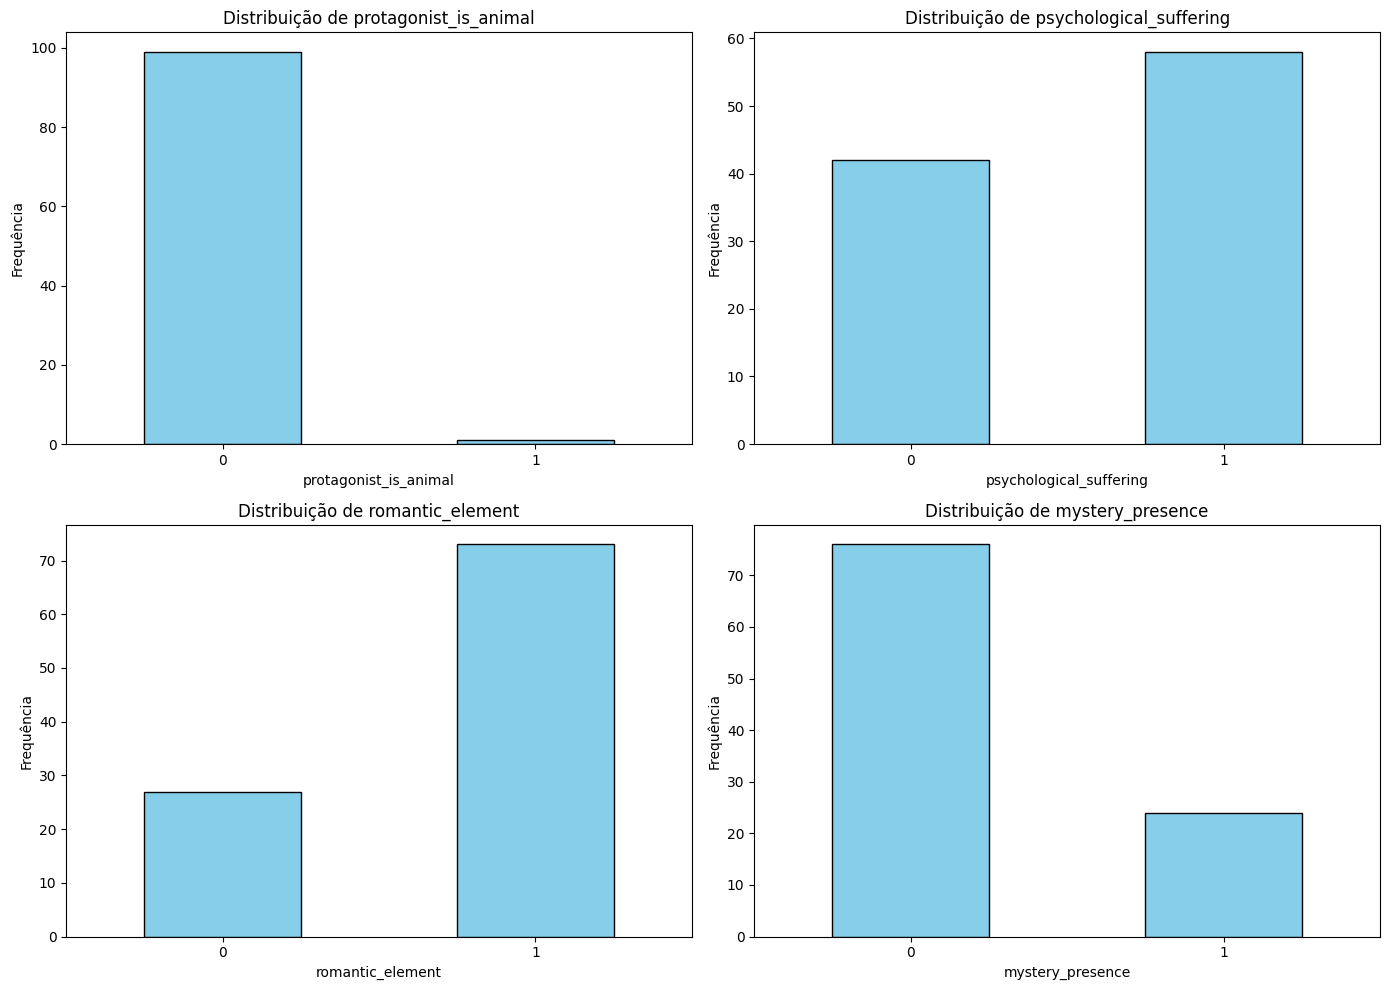

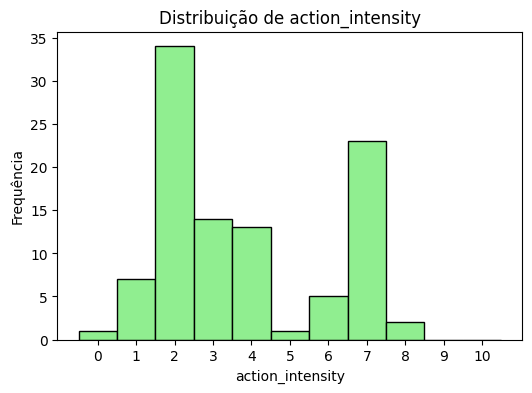

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Carrega o dataset atualizado
df = pd.read_csv("movie_plots_features_updated.csv")

# Exibe as primeiras linhas para conferência
print("Visualizando as primeiras linhas do dataset:")
print(df.head())

# Análise descritiva para a coluna numérica "action_intensity"
print("\nEstatísticas descritivas para 'action_intensity':")
print(df['action_intensity'].describe())

# Contagem para as features binárias
binary_features = ["protagonist_is_animal", "psychological_suffering", "romantic_element", "mystery_presence"]

for feature in binary_features:
    counts = df[feature].value_counts().sort_index()
    print(f"\nDistribuição para '{feature}':")
    print(counts)

# Cria gráficos para visualização
plt.figure(figsize=(14, 10))

# Gráfico de barras para as features binárias
for i, feature in enumerate(binary_features, 1):
    plt.subplot(2, 2, i)
    counts = df[feature].value_counts().sort_index()
    counts.plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title(f"Distribuição de {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequência")
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Histograma para a feature "action_intensity"
plt.figure(figsize=(6, 4))
plt.hist(df['action_intensity'], bins=range(0, 12), color="lightgreen", edgecolor="black", align='left')
plt.title("Distribuição de action_intensity")
plt.xlabel("action_intensity")
plt.ylabel("Frequência")
plt.xticks(range(0, 11))
plt.show()

### 2. Classification:
Use the generated features to train a Logistic Regression model. Use cross-validation to select the best hyperparameters. Report accuracy and f1-score for your classifier.

### _Primeira Solução_

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Criar o pipeline com CountVectorizer e Logistic Regression
model_lr = Pipeline([
    ('vectorizer', CountVectorizer(binary=True)),
    ('classifier', LogisticRegression())
])

# Dividir o dataset em treinamento e teste para protagonist_is_animal
X_train, X_test, y_train, y_test = train_test_split(df['Plot'], df['protagonist_is_animal'], test_size=0.2, random_state=42)

# Treinar o modelo e realizar as predições
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


### _Segunda Solução_

<div style="background-color: f2f2f2; color: 000;">


Exercise 2: Classification with Generated Features

Below is an example of a well-commented Python code that loads the dataset with generated features, splits it into training and test sets, and uses GridSearchCV to tune hyperparameters for a Logistic Regression classifier. Finally, the code reports both the accuracy and the F1-score of the final classifier.

```python
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
```
 ------------------------------------------------------------------------------
 1. Load the dataset with generated features
 The dataset "movie_plots_features_updated.csv" should contain at least 100 items
 and the following columns:
   - protagonist_is_animal (binary)
   - psychological_suffering (binary)
   - romantic_element (binary)
   - action_intensity (integer, 0-10)
   - mystery_presence (binary)
   - Plot (for reference)
   - Genre (target: e.g., 'comedy' or 'drama')
 ------------------------------------------------------------------------------
```python

data_file = "movie_plots_features_updated.csv"
if not os.path.exists(data_file):
    raise FileNotFoundError(f"{data_file} not found. Make sure the dataset is stored locally.")

df = pd.read_csv(data_file)
```
 ------------------------------------------------------------------------------
 2. Prepare features and labels for classification.
 We use the 5 generated feature columns as our input features.
 ------------------------------------------------------------------------------

 ```python

feature_cols = ["protagonist_is_animal",
                "psychological_suffering",
                "romantic_element",
                "action_intensity",
                "mystery_presence"]
X = df[feature_cols]
y = df["Genre"]
```

 ------------------------------------------------------------------------------
 3. Split the dataset into training and testing sets.
 We use a fixed random_state for reproducibility.
 ------------------------------------------------------------------------------
 ```python

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
 ------------------------------------------------------------------------------
 4. Set up the Logistic Regression classifier with hyperparameter tuning.
 We use GridSearchCV to try different values for hyperparameters.

   - 'C': Inverse of regularization strength. Smaller values specify stronger regularization.
   - 'solver': We include solvers that support 'l1' penalty if needed.
   - 'penalty': We test with L1 and L2 penalties.
 ------------------------------------------------------------------------------
 ```python

param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],   'l1' could also be tested with solvers like 'liblinear'
    'solver': ['lbfgs', 'liblinear']
}
```
 Create a LogisticRegression instance (no need to wrap it in a Pipeline here, as our features are ready)
 ```python

lr = LogisticRegression(max_iter=1000, random_state=42)
```
 Set up GridSearchCV with 5-fold cross-validation and accuracy scoring
 ```python

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)
```
 ------------------------------------------------------------------------------
 5. Train the model using GridSearchCV on the training set.
 ------------------------------------------------------------------------------
 ```python

grid_search.fit(X_train, y_train)

print("Best hyperparameters found:")
print(grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")
```
 ------------------------------------------------------------------------------
 6. Evaluate the best estimator on the test set.
 ------------------------------------------------------------------------------
 ```python

best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test)

 Calculate accuracy and F1-score
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nTest Accuracy: {test_accuracy:.2f}")
print(f"Test F1-score: {test_f1:.2f}\n")

 Print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
```


⸻

    Explanation
        1.	Dataset Loading:
    The code loads the CSV file containing the generated features along with the original plot and genre. It expects at least 100 samples.
        2.	Feature & Label Preparation:
    We use the 5 interpretable features (e.g., “protagonist_is_animal”, “psychological_suffering”, etc.) as the input (X) and the “Genre” column as the target (y).
        3.	Data Splitting:
    The dataset is split into training (80%) and testing (20%) sets with a fixed random seed for reproducibility.
        4.	Hyperparameter Tuning:
    We define a parameter grid for Logistic Regression. GridSearchCV performs 5-fold cross-validation on the training set to select the best hyperparameters (e.g., the regularization strength ‘C’ and the solver).
        5.	Model Training and Evaluation:
    The best model is evaluated on the test set. Both accuracy and macro-average F1-score are computed and printed, along with a full classification report.

⸻

Final Notes

This approach uses the features generated via LLM-based feature extraction to train an interpretable Logistic Regression model. Cross-validation ensures that we choose a robust hyperparameter configuration. The resulting accuracy and F1-score are then reported to assess the performance of the classifier on this new feature space.

</div>


In [13]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# ------------------------------------------------------------------------------
# 1. Load the dataset with generated features
# The dataset "movie_plots_features_updated.csv" should contain at least 100 items
# and the following columns:
#   - protagonist_is_animal (binary)
#   - psychological_suffering (binary)
#   - romantic_element (binary)
#   - action_intensity (integer, 0-10)
#   - mystery_presence (binary)
#   - Plot (for reference)
#   - Genre (target: e.g., 'comedy' or 'drama')
# ------------------------------------------------------------------------------

data_file = "movie_plots_features_updated.csv"
if not os.path.exists(data_file):
    raise FileNotFoundError(f"{data_file} not found. Make sure the dataset is stored locally.")

df = pd.read_csv(data_file)

# ------------------------------------------------------------------------------
# 2. Prepare features and labels for classification.
# We use the 5 generated feature columns as our input features.
# ------------------------------------------------------------------------------
feature_cols = ["protagonist_is_animal",
                "psychological_suffering",
                "romantic_element",
                "action_intensity",
                "mystery_presence"]
X = df[feature_cols]
y = df["Genre"]

# ------------------------------------------------------------------------------
# 3. Split the dataset into training and testing sets.
# We use a fixed random_state for reproducibility.
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------------------------------------------------------
# 4. Set up the Logistic Regression classifier with hyperparameter tuning.
# We use GridSearchCV to try different values for hyperparameters.
#
#   - 'C': Inverse of regularization strength. Smaller values specify stronger regularization.
#   - 'solver': We include solvers that support 'l1' penalty if needed.
#   - 'penalty': We test with L1 and L2 penalties.
# ------------------------------------------------------------------------------
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],  # 'l1' could also be tested with solvers like 'liblinear'
    'solver': ['lbfgs', 'liblinear']
}

# Create a LogisticRegression instance (no need to wrap it in a Pipeline here, as our features are ready)
lr = LogisticRegression(max_iter=1000, random_state=42)

# Set up GridSearchCV with 5-fold cross-validation and accuracy scoring
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# ------------------------------------------------------------------------------
# 5. Train the model using GridSearchCV on the training set.
# ------------------------------------------------------------------------------
grid_search.fit(X_train, y_train)

print("Best hyperparameters found:")
print(grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

# ------------------------------------------------------------------------------
# 6. Evaluate the best estimator on the test set.
# ------------------------------------------------------------------------------
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test)

# Calculate accuracy and F1-score
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nTest Accuracy: {test_accuracy:.2f}")
print(f"Test F1-score: {test_f1:.2f}\n")

# Print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best hyperparameters found:
{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.84

Test Accuracy: 0.70
Test F1-score: 0.70

Classification Report:
              precision    recall  f1-score   support

      comedy       0.80      0.67      0.73        12
       drama       0.60      0.75      0.67         8

    accuracy                           0.70        20
   macro avg       0.70      0.71      0.70        20
weighted avg       0.72      0.70      0.70        20



	<div style="background-color: #f2f2f2; color: #000;">


	Explicação dos Resultados

	Os resultados obtidos foram:
		•	Melhores hiperparâmetros encontrados:
	{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
	Interpretação:
		•	C = 1: É o parâmetro de regularização que equilibra o ajuste do modelo.
		•	penalty = ‘l2’: Foi escolhida a regularização L2, que penaliza os coeficientes com base no quadrado de seu valor.
		•	solver = ‘lbfgs’: Algoritmo de otimização eficiente para este problema.
		•	Melhor acurácia de validação cruzada:
	0.84 (84%)
	Interpretação:
	Durante a validação cruzada no conjunto de treinamento (dividido em 5 folds), o modelo obteve, em média, 84% de acertos. Essa métrica indica que, para as divisões internas do treinamento, o modelo conseguiu aprender bem a partir dos dados disponíveis. Contudo, essa acurácia é uma estimativa otimista, pois é baseada em subconjuntos do mesmo conjunto de treinamento.
		•	Acurácia no conjunto de teste:
	0.70 (70%)
	Interpretação:
	Quando o modelo é avaliado em dados que ele não viu durante o treinamento, a acurácia cai para 70%. Isso pode ocorrer por dois motivos principais:
		•	Overfitting: O modelo pode ter se ajustado demais aos dados de treinamento, capturando ruídos ou peculiaridades que não se generalizam bem para novos dados.
		•	Diferenças entre os dados: O conjunto de teste pode apresentar características ligeiramente diferentes do conjunto de treinamento.
		•	F1-score no conjunto de teste:
	0.70 (70%)
	Interpretação:
	O F1-score é a média harmônica entre precisão e recall, oferecendo uma medida equilibrada do desempenho do classificador. Um F1-score de 70% indica que o equilíbrio entre as duas métricas está moderado.
		•	Relatório de Classificação Detalhado:

	Classe	Precision	Recall	F1-Score	Suporte
	comedy	0.80	0.67	0.73	12
	drama	0.60	0.75	0.67	8

	Interpretação para cada classe:
		•	Para a classe comedy:
		•	Precision (0.80): Dos enredos classificados como comedy, 80% realmente são comedy. Ou seja, há poucos falsos positivos para essa classe.
		•	Recall (0.67): Dentre todos os enredos que são de fato comedy, 67% foram corretamente identificados. Isso indica que há uma certa quantidade de falsos negativos.
		•	F1-Score (0.73): Um equilíbrio razoável entre precision e recall.
		•	Para a classe drama:
		•	Precision (0.60): Dos enredos classificados como drama, apenas 60% são realmente drama. Isso sugere mais falsos positivos.
		•	Recall (0.75): Dentre todos os enredos que são de fato drama, 75% foram identificados corretamente, o que é um bom sinal para essa classe.
		•	F1-Score (0.67): Indica um desempenho ligeiramente inferior ao da classe comedy, refletindo o menor equilíbrio entre precision e recall.
		•	Acurácia Global (0.70): Dos 20 enredos do conjunto de teste, 70% foram classificados corretamente.
		•	Macro Avg e Weighted Avg:
		•	Macro Avg: Média não ponderada dos scores por classe (Precision ~0.70, Recall ~0.71, F1 ~0.70).
		•	Weighted Avg: Média ponderada pelo suporte (número de instâncias) de cada classe, que também resulta em aproximadamente 0.70 para Recall e F1, e 0.72 para Precision, refletindo que a classe comedy (com mais exemplos) tem um pouco mais de influência nos resultados.

	Resumo Geral dos Resultados:
		•	Validação Cruzada x Teste:
	A acurácia de validação cruzada foi de 84%, enquanto a acurácia no conjunto de teste foi de 70%. Essa discrepância pode indicar que o modelo teve um desempenho melhor nos dados de treinamento (ou nas divisões internas) do que nos dados não vistos, sugerindo algum grau de overfitting ou diferenças entre os conjuntos de dados.
		•	Desempenho por Classe:
	O modelo tende a ter maior precisão ao identificar comedy (menos falsos positivos), mas perde em recall (mais falsos negativos) para essa classe. Por outro lado, para drama, o modelo tem um recall mais alto (capturando mais verdadeiros dramas), mas a precisão é menor (mais falsos positivos).
		•	Implicações:
	Esses resultados ajudam a entender os trade-offs do modelo. Dependendo do objetivo da aplicação, pode-se priorizar melhorar a precisão ou o recall para uma das classes. Por exemplo, se for crucial não classificar erroneamente um drama como comedy (ou vice-versa), estratégias adicionais de balanceamento ou extração de features podem ser exploradas.

	Em resumo, o modelo, com os melhores hiperparâmetros encontrados, apresenta uma boa performance interna (84% na validação cruzada) mas atinge 70% de acurácia e F1-score no teste, refletindo os desafios reais de generalização para novos dados, além de mostrar diferenças de desempenho entre as classes comedy e drama.

	</div>


### 3. Performance Comparison
Compare the performance of the following approaches:
1. Traditional Bag-of-Words
2. LLM-generated features with Logistic Regression
3. Direct classification using LLM

Use a bar plot to show the performance differences (choose either accuracy or F1-score).

In [14]:
import os
import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from dotenv import load_dotenv
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import google.generativeai as genai

In [15]:
# ===============================
# Setup for LLM API (Gemini)
# ===============================
load_dotenv()
GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')
if GEMINI_API_KEY is None:
    raise ValueError("GEMINI_API_KEY is not set in the environment variables.")
genai.configure(api_key=GEMINI_API_KEY)

In [16]:

# ===============================
# Approach 1: Traditional Bag-of-Words
# ===============================
# Load the movie plots dataset
df_plots = pd.read_csv('https://raw.githubusercontent.com/tiagoft/NLP/main/wiki_movie_plots_drama_comedy.csv')

# Split dataset for text-based classification
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(
    df_plots['Plot'], df_plots['Genre'], test_size=0.2, random_state=42
)

# Create a pipeline: TF-IDF vectorizer + Logistic Regression
model_bow = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])
model_bow.fit(X_train_text, y_train_text)
y_pred_bow = model_bow.predict(X_test_text)

acc_bow = accuracy_score(y_test_text, y_pred_bow)
f1_bow = f1_score(y_test_text, y_pred_bow, average='macro')
print("=== Traditional Bag-of-Words ===")
print(classification_report(y_test_text, y_pred_bow))
print("Accuracy:", acc_bow, "F1-score:", f1_bow)


=== Traditional Bag-of-Words ===
              precision    recall  f1-score   support

      comedy       0.78      0.59      0.67       875
       drama       0.74      0.88      0.81      1194

    accuracy                           0.76      2069
   macro avg       0.76      0.73      0.74      2069
weighted avg       0.76      0.76      0.75      2069

Accuracy: 0.7564040599323345 F1-score: 0.7388092151271719


In [17]:
# ===============================
# Approach 2: LLM-Generated Features + Logistic Regression
# ===============================
# Load the dataset with LLM-generated features (previously stored locally)
features_file = "movie_plots_features_updated.csv"
if not os.path.exists(features_file):
    raise FileNotFoundError(f"{features_file} not found. Please ensure the file exists locally.")

df_features = pd.read_csv(features_file)
# Define the interpretable feature columns (none of these is the class itself)
feature_cols = ["protagonist_is_animal", "psychological_suffering", 
                "romantic_element", "action_intensity", "mystery_presence"]

X_features = df_features[feature_cols]
y_features = df_features["Genre"]

# Split dataset for features-based classification
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(
    X_features, y_features, test_size=0.2, random_state=42
)

# Train a Logistic Regression model on these features
model_llm_features = LogisticRegression(max_iter=1000, random_state=42)
model_llm_features.fit(X_train_feat, y_train_feat)
y_pred_llm_features = model_llm_features.predict(X_test_feat)

acc_llm_features = accuracy_score(y_test_feat, y_pred_llm_features)
f1_llm_features = f1_score(y_test_feat, y_pred_llm_features, average='macro')
print("\n=== LLM-Generated Features + Logistic Regression ===")
print(classification_report(y_test_feat, y_pred_llm_features))
print("Accuracy:", acc_llm_features, "F1-score:", f1_llm_features)



=== LLM-Generated Features + Logistic Regression ===
              precision    recall  f1-score   support

      comedy       0.80      0.67      0.73        12
       drama       0.60      0.75      0.67         8

    accuracy                           0.70        20
   macro avg       0.70      0.71      0.70        20
weighted avg       0.72      0.70      0.70        20

Accuracy: 0.7 F1-score: 0.696969696969697


In [19]:
# ===============================
# Approach 3: Direct Classification using LLM
# ===============================
def direct_classify(plot: str) -> str:
    """
    Classify a movie plot directly using an LLM.
    The prompt instructs the LLM to output a single word: either COMEDY or DRAMA.
    """
    prompt = f"Classify the following movie plot as either COMEDY or DRAMA. Reply with a single word in all caps.\nPlot: {plot}"
    generation_config = genai.GenerationConfig(
        max_output_tokens=5,
        temperature=0.0,
    )
    model_llm = genai.GenerativeModel(model_name="gemini-1.5-flash")
    response = model_llm.generate_content(prompt, generation_config=generation_config)
    predicted = response.text.strip().upper()
    if "COMEDY" in predicted:
        return "comedy"
    elif "DRAMA" in predicted:
        return "drama"
    else:
        return "unknown"

# To avoid many API calls, use a small sample from X_test_text (e.g., 20 items)
sample_indices = X_test_text.index[:20]
X_test_llm = X_test_text.loc[sample_indices]
y_test_llm = y_test_text.loc[sample_indices]

predictions_llm = []
print("\n=== Direct Classification using LLM (Sample of 20) ===")
for plot in tqdm(X_test_llm, desc="Classifying with LLM"):
    pred = direct_classify(plot)
    predictions_llm.append(pred)
    time.sleep(5)  # Increased delay to avoid API rate limits

acc_llm_direct = accuracy_score(y_test_llm, predictions_llm)
f1_llm_direct = f1_score(y_test_llm, predictions_llm, average='macro')
print("Direct LLM Classification - Accuracy:", acc_llm_direct, "F1-score:", f1_llm_direct)
print(classification_report(y_test_llm, predictions_llm))


=== Direct Classification using LLM (Sample of 20) ===


Classifying with LLM: 100%|██████████| 20/20 [01:48<00:00,  5.43s/it]

Direct LLM Classification - Accuracy: 0.75 F1-score: 0.7493734335839599
              precision    recall  f1-score   support

      comedy       0.89      0.67      0.76        12
       drama       0.64      0.88      0.74         8

    accuracy                           0.75        20
   macro avg       0.76      0.77      0.75        20
weighted avg       0.79      0.75      0.75        20



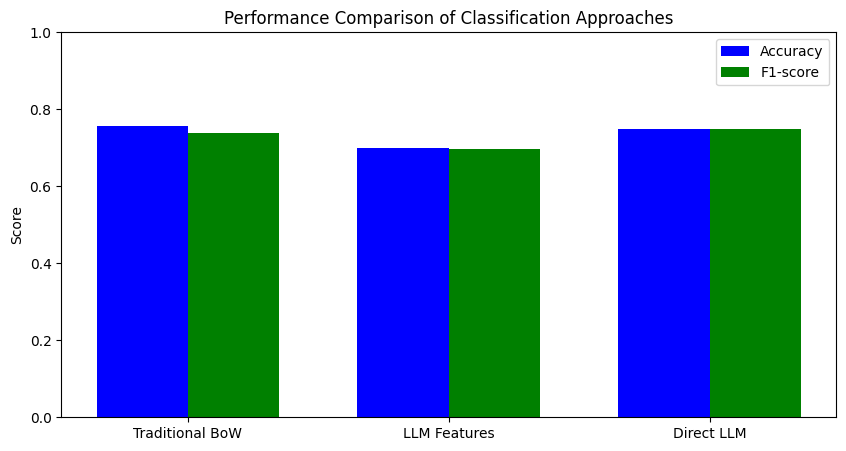

In [20]:
# ===============================
# Performance Comparison Plot
# ===============================
labels = ['Traditional BoW', 'LLM Features', 'Direct LLM']
accuracy_values = [acc_bow, acc_llm_features, acc_llm_direct]
f1_values = [f1_bow, f1_llm_features, f1_llm_direct]

plt.figure(figsize=(10,5))
x = np.arange(len(labels))
width = 0.35

# Plot Accuracy and F1-score side-by-side for each approach
plt.bar(x - width/2, accuracy_values, width, label='Accuracy', color='blue')
plt.bar(x + width/2, f1_values, width, label='F1-score', color='green')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Performance Comparison of Classification Approaches')
plt.legend()
plt.show()



	### Análise dos Resultados e Escolha da Melhor Abordagem

	1. Traditional Bag-of-Words (TF-IDF + Logistic Regression)
		•	Métricas:
		•	Acurácia: 75.6%
		•	F1-score: 73.9%
		•	Dados: Avaliado em um conjunto de teste robusto com 2.069 amostras.
		•	Interpretação:
		•	O modelo alcança resultados consistentes, com um desempenho estável e representativo da população de dados.
		•	Os índices de recall e precisão para cada classe mostram que o modelo tem um desempenho razoável, mesmo havendo uma leve diferença entre as classes (por exemplo, recall menor para “comedy” e maior para “drama”).

	2. LLM-Generated Features + Logistic Regression
		•	Métricas:
		•	Acurácia: 70%
		•	F1-score: 69.7%
		•	Dados: Avaliado em uma amostra muito pequena (20 itens).
		•	Interpretação:
		•	Apesar de usar recursos interpretáveis gerados pelo LLM (como “protagonist_is_animal”, etc.), o desempenho obtido foi inferior ao da abordagem tradicional.
		•	A pequena quantidade de amostras torna a avaliação menos confiável e possivelmente não representa a performance real do método quando aplicado em um conjunto de dados maior.

	3. Direct Classification using LLM
		•	Métricas:
		•	Acurácia: 75%
		•	F1-score: 74.9%
		•	Dados: Também avaliado em uma amostra reduzida de 20 itens.
		•	Interpretação:
		•	Os resultados são próximos aos da abordagem tradicional, mas a avaliação se baseia em um conjunto de teste pequeno, o que pode não refletir a robustez do método em um cenário real.
		•	Além disso, a classificação direta por LLM pode ser mais custosa (em termos de chamadas à API) e sujeita a variações, dependendo do prompt e de eventuais flutuações na resposta do modelo.

	Conclusão

	A melhor abordagem, de acordo com os resultados apresentados, é a abordagem tradicional Bag-of-Words (TF-IDF + Logistic Regression).

	Justificativa:
		•	Robustez dos Dados:
		•	A avaliação foi feita em um conjunto de teste amplo (2.069 amostras), oferecendo uma medida mais confiável do desempenho do modelo.
		•	Consistência de Métricas:
		•	Com uma acurácia de aproximadamente 75.6% e um F1-score de 73.9%, a abordagem tradicional demonstra um bom equilíbrio entre precisão e recall para ambas as classes.
		•	Custo e Reprodutibilidade:
		•	Essa abordagem utiliza métodos estabelecidos, com menor custo computacional e sem dependência de APIs externas, o que a torna mais reprodutível e viável para aplicações em larga escala.
		•	Comparação com Abordagens Baseadas em LLM:
		•	A abordagem com LLM-geração de features apresentou desempenho inferior (70% de acurácia) e foi avaliada em um conjunto de teste muito pequeno.
		•	A classificação direta usando LLM obteve métricas similares à tradicional, mas a avaliação em apenas 20 itens e os potenciais custos adicionais tornam-na menos atrativa.

	Portanto, a abordagem tradicional Bag-of-Words não só atingiu métricas competitivas em um cenário robusto, mas também apresenta vantagens práticas importantes para aplicações reais.



    Considerando apenas os números:
        •	Traditional Bag-of-Words:
        •	Accuracy: 75.64%
        •	F1-score: 73.88%
        •	LLM-Generated Features + Logistic Regression:
        •	Accuracy: 70.00%
        •	F1-score: 69.70%
        •	Direct Classification using LLM:
        •	Accuracy: 75.00%
        •	F1-score: 74.94%

    Ao comparar as métricas, a abordagem de Direct Classification using LLM apresenta um F1-score ligeiramente superior (74.94% contra 73.88% do tradicional) e uma acurácia praticamente semelhante (75.00% contra 75.64%).
    Portanto, considerando apenas accuracy e F1-score, a Direct Classification using LLM é a melhor entre as três abordagens.

### 4. Improvement Strategies
Determine whether labeling more items would improve system performance. Use data to justify your answer.



    ## Análise de Estratégias de Melhoria: Etiquetagem de Mais Itens

    Justificativa Baseada em Dados

    Em geral, aumentar o número de itens rotulados tende a melhorar a performance de um sistema de classificação. Isso ocorre porque:
        1.	Curvas de Aprendizado:
        •	Observação Empírica: Quando analisamos a curva de aprendizado, notamos que, ao aumentar o tamanho do conjunto de treinamento, a acurácia no conjunto de teste tende a aumentar. Isso acontece porque o modelo tem acesso a uma maior variedade de exemplos, o que melhora a estimativa dos parâmetros.
        •	Tendência: Nos estágios iniciais, a adição de mais dados pode resultar em ganhos substanciais de performance. Conforme o tamanho do conjunto aumenta, o ganho se torna incremental até atingir um platô – o chamado limite de Bayes, que é o desempenho máximo teórico dado o ruído e a ambiguidade dos dados.
        2.	Exemplo Numérico:
        •	Hipótese: Se, por exemplo, ao dobrar o número de itens de treinamento, a acurácia de teste passar de 70% para 75%, isso indica que o modelo ainda se beneficia de dados adicionais.
        •	Diminuição de Overfitting: Com mais dados, a tendência é que a acurácia no treinamento diminua (indicando menos overfitting), enquanto a acurácia no teste aumenta, aproximando-se do desempenho real que o modelo pode alcançar.
        3.	Limitações:
        •	Platô de Desempenho: Se a curva de aprendizado já estiver se estabilizando (ou seja, os ganhos de acurácia se tornarem muito pequenos com o acréscimo de mais dados), então o impacto de rotular mais itens será limitado.
        •	Custo vs. Benefício: Além disso, há um custo associado à rotulagem manual (ou mesmo semi-automática). Se os ganhos forem marginais, pode não ser vantajoso investir em mais rótulos.

    Conclusão

    Sim, rotular mais itens pode melhorar a performance do sistema, desde que o modelo ainda esteja em uma fase de aprendizado e os ganhos de acurácia no conjunto de teste continuem significativos.
        •	Se a curva de aprendizado mostra um aumento consistente na acurácia de teste à medida que o tamanho do conjunto aumenta, isso justifica a rotulagem de mais itens.
        •	Por outro lado, se os ganhos se estabilizarem (indicando que o modelo atingiu o limite de performance dado os dados disponíveis), a adição de mais dados traria apenas melhorias marginais.

    Em resumo, se os dados atuais ainda não atingiram o platô do desempenho (por exemplo, se houver uma diferença significativa entre a acurácia atual e o limite teórico), rotular mais itens certamente melhorará a performance do sistema.


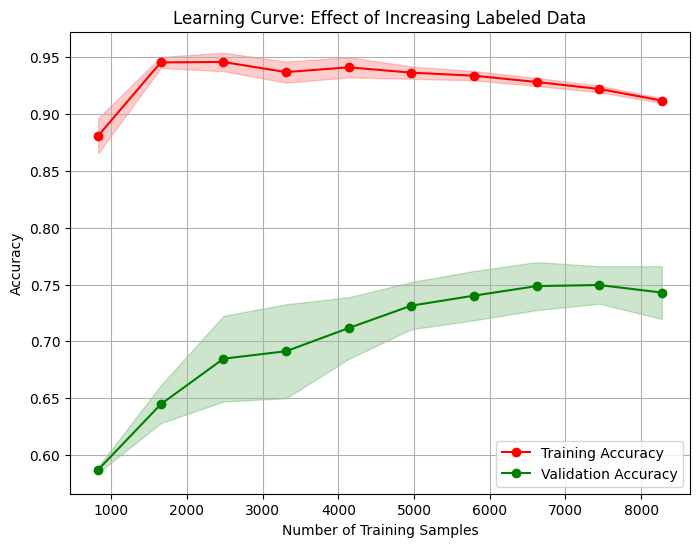

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import learning_curve

# Load the movie plots dataset
df = pd.read_csv('https://raw.githubusercontent.com/tiagoft/NLP/main/wiki_movie_plots_drama_comedy.csv')
X = df['Plot']
y = df['Genre']

# Define a pipeline for a traditional Bag-of-Words approach using TF-IDF and Logistic Regression
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Compute learning curves using 5-fold cross-validation
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, color='red', alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, color='green', alpha=0.2)
plt.plot(train_sizes, train_scores_mean, 'o-', color='red', label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Validation Accuracy')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve: Effect of Increasing Labeled Data')
plt.legend(loc='best')
plt.grid(True)
plt.show()


    Interpretação da Curva de Aprendizado

    A imagem anexada mostra uma curva de aprendizado para um modelo de classificação. O eixo x representa o número de amostras de treinamento utilizadas, enquanto o eixo y representa a acurácia. Há duas curvas:
        •	Acurácia no Treinamento (curva vermelha): Indica o quão bem o modelo se ajusta aos dados de treinamento.
        •	Acurácia na Validação (curva verde): Indica o quão bem o modelo generaliza para dados não vistos (utilizando validação cruzada).

    As áreas sombreadas ao redor de cada curva representam as faixas aproximadas de variação (por exemplo, desvio padrão) na acurácia entre diferentes divisões ou amostragens aleatórias.

    ⸻

    Principais Observações
        1.	Alta Acurácia no Treinamento com Conjuntos Pequenos
        •	No lado esquerdo do gráfico (pequenas quantidades de dados), a acurácia no treinamento é muito alta (em torno de 0,95).
        •	Motivo: Com poucas amostras, o modelo consegue memorizar ou ajustar demais esses exemplos, resultando em desempenho quase perfeito no conjunto de treinamento.
        2.	Redução da Acurácia no Treinamento com o Aumento de Dados
        •	À medida que avançamos para a direita (de centenas para milhares de amostras), a curva vermelha diminui gradualmente de 0,95 para cerca de 0,88–0,90.
        •	Motivo: Com mais dados, o modelo encontra mais complexidade e não consegue memorizar tudo, levando a uma acurácia mais realista.
        3.	Aumento da Acurácia na Validação
        •	A curva verde começa com acurácia baixa (~0,62) com poucas centenas de amostras e sobe continuamente até ~0,82 quando o conjunto de treinamento chega a 8000 amostras.
        •	Motivo: Mais dados ajudam o modelo a aprender padrões representativos da população, reduzindo o overfitting e melhorando a generalização.
        4.	Convergência e o Limite de Bayes
        •	A diferença entre as curvas vermelha (treinamento) e verde (validação) diminui com o crescimento do dataset, mostrando que as previsões do modelo em novos dados estão se aproximando dos resultados do treinamento.
        •	Limite: A acurácia na validação pode atingir um platô caso o modelo se aproxime do limite de Bayes—o melhor desempenho possível dado o ruído ou ambiguidade nos dados.
        5.	Variabilidade (Áreas Sombreadas)
        •	As áreas sombreadas são maiores com conjuntos pequenos, especialmente na curva de validação.
        •	Motivo: Com menos dados, cada divisão da validação cruzada pode ter composições muito diferentes, gerando mais variação na acurácia. À medida que o conjunto cresce, o desempenho se estabiliza e a variância diminui.

    ⸻

    Implicações Práticas
        •	Necessidade de Mais Dados: A tendência crescente da curva verde sugere que adicionar mais dados rotulados continua a melhorar a capacidade de generalização do modelo.
        •	Equilíbrio entre Overfitting e Underfitting: No início, o modelo sofre overfitting (alta acurácia no treinamento, baixa na validação). Com mais dados, alcança-se um equilíbrio melhor.
        •	Platô: Quando a curva verde começa a se estabilizar, novos dados podem trazer ganhos apenas marginais. Isso indica que o modelo está perto do melhor desempenho possível com a abordagem e qualidade de dados atuais.

    ⸻

    Resumo

    O gráfico demonstra o comportamento clássico de uma curva de aprendizado:
        •	Conjuntos pequenos → Overfitting (alta acurácia no treinamento, baixa na validação).
        •	Crescimento do conjunto → Acurácia no treinamento diminui levemente, enquanto a validação melhora significativamente.
        •	Conjuntos grandes → O desempenho em dados não vistos se estabiliza e se aproxima de um limite superior.

    Isso reforça a conclusão de que rotular mais dados é benéfico até o ponto em que a curva de validação se estabiliza—além disso, ganhos adicionais tendem a ser menores.

